The following example shows how to use bet to calculate rotor forces. The root finding solver is called when stepping each elemental span dy at each y position per rotation speed, omega. We can expect a few root finding warnings (< 10) on each omega. The initial guess of downwash, v_i_0, is independent of the span, and only vary with rotation speed. The rotor disk center can naturally produce smaller amount of downwash and, therefore, the solver may struggle when y is small.

The f_z is not perfectly aligned with the experimental result because the polynomial of the blade chord and c_l c_d distribution is not shared by the paper. But the trend alignment is enough to continue for future simulation work.

cl_1: 5.3, cl_2: 1.7, cd: 1.8, alpha_0: 0.3595378259108319
omega: 0
f_x: 0.0, f_y: 0.0, f_z: 0.0, v_i: 0.0
----------
omega: 200
f_x: -2.5749801596530807e-20, f_y: -2.2117724318704297e-18, f_z: 0.1247287201227847, v_i: 0.1331486408974463
----------
omega: 300
f_x: -4.046483441532009e-18, f_y: -6.1727243686841374e-18, f_z: 0.41213334468460416, v_i: 0.43971819072446056
----------
omega: 400
f_x: -6.967203627299903e-18, f_y: -1.5776346278744633e-17, f_z: 0.7671507012130384, v_i: 0.8501014904686751
----------
omega: 500
f_x: -7.068998164605488e-18, f_y: -2.4546337185071824e-17, f_z: 1.181141920873721, v_i: 1.381264841279181
----------
omega: 600
f_x: -8.628442289363807e-18, f_y: -3.39813054238568e-17, f_z: 1.640041812916614, v_i: 2.062468181452891
----------
omega: 700
f_x: -1.7503841740238204e-17, f_y: -5.279341778556081e-17, f_z: 2.1396245615907348, v_i: 3.0070827574963843
----------
omega: 800
f_x: -2.9574625927243483e-18, f_y: -6.406912037941008e-17, f_z: 2.609739011810618, v_i: 4.6254

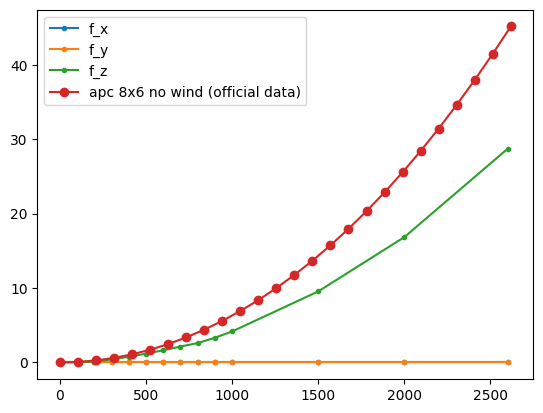

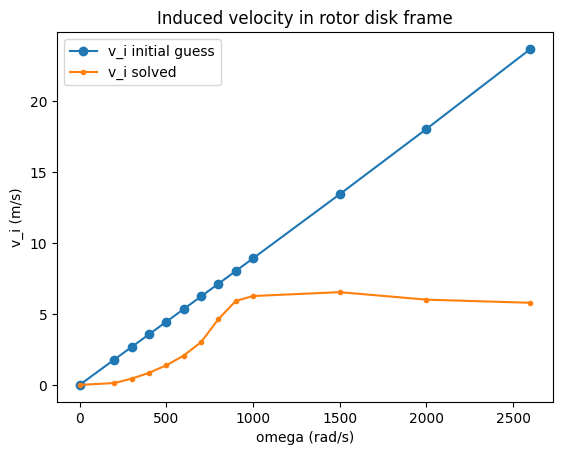

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from blade_params import Blade, APC_8x6, APC_8x6_OfficialData
from bet import BladeElementTheory

blade = APC_8x6()
can_run_fitted_params = False
if can_run_fitted_params:
    blade.cl_1, blade.cl_2, blade.cd, blade.alpha_0 = (5.34535047, 1.49428897, 1.63329779, 0.46934187)  # fitted parameters
print(f"cl_1: {blade.cl_1}, cl_2: {blade.cl_2}, cd: {blade.cd}, alpha_0: {blade.alpha_0}")
bet_instance = BladeElementTheory(blade)
u_free = np.array([13.0, 0, 0])
v_forward = np.array([0, 0, 0])
r_disk = bet_instance.pitch_rotor_disk_along_y_axis(np.radians(90))
is_ccw_blade = True

omega_range = np.array([0, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2600])
# omega_range = np.array([600, 700, 800, 900, 1000])    # subset of range for debugging
f = np.zeros([3, len(omega_range)])
v_trail = np.zeros(len(omega_range))
v_trail_init = np.zeros(len(omega_range))
for i, omega in enumerate(omega_range):
    f_x, f_y, f_z, v_i = bet_instance.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw_blade)
    v_trail_init[i] = bet_instance.guess_initial_v_i(0.0, omega, True)[0]
    print(f"omega: {omega}")
    print(f"f_x: {f_x}, f_y: {f_y}, f_z: {f_z}, v_i: {v_i}")
    print("-" * 10)
    f[0, i] = f_x
    f[1, i] = f_y
    f[2, i] = f_z
    v_trail[i] = v_i
plt.plot(omega_range, f[0, :], '.-', label='f_x')
plt.plot(omega_range, f[1, :], '.-', label='f_y')
plt.plot(omega_range, f[2, :], '.-', label='f_z')

plt.plot(APC_8x6_OfficialData.get_omega_range(), 
            APC_8x6_OfficialData.get_thrust_range(), 
            'o-', label='apc 8x6 no wind (official data)')
plt.legend()
print(f"f_x: {f[0, :]}")
print(f"f_y: {f[1, :]}")
print(f"f_z: {f[2, :]}")

plt.figure()
plt.plot(omega_range, v_trail_init, 'o-', label='v_i initial guess')
plt.plot(omega_range, v_trail, '.-', label='v_i solved')
plt.legend()
plt.xlabel('omega (rad/s)')
plt.ylabel('v_i (m/s)')
plt.title('Induced velocity in rotor disk frame')
plt.show()